## Description

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius(체감온도)
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv("train.csv",parse_dates=["datetime"])

In [3]:
train.shape

(10886, 12)

In [4]:
train.info()
train.columns
train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [5]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [6]:
train.tail(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10866,2012-12-19 04:00:00,4,0,1,1,9.84,12.120,75,8.9981,1,6,7
10867,2012-12-19 05:00:00,4,0,1,1,10.66,14.395,75,6.0032,2,29,31
10868,2012-12-19 06:00:00,4,0,1,1,9.84,12.880,75,6.0032,3,109,112
10869,2012-12-19 07:00:00,4,0,1,1,10.66,13.635,75,8.9981,3,360,363
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317
10872,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,164
10873,2012-12-19 11:00:00,4,0,1,1,16.40,20.455,54,15.0013,31,169,200
10874,2012-12-19 12:00:00,4,0,1,1,16.40,20.455,54,19.0012,33,203,236
10875,2012-12-19 13:00:00,4,0,1,1,17.22,21.210,50,12.9980,30,183,213


In [7]:
train.atemp.describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [1]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

ModuleNotFoundError: No module named 'missingno'

In [10]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<AxesSubplot:xlabel='second', ylabel='count'>

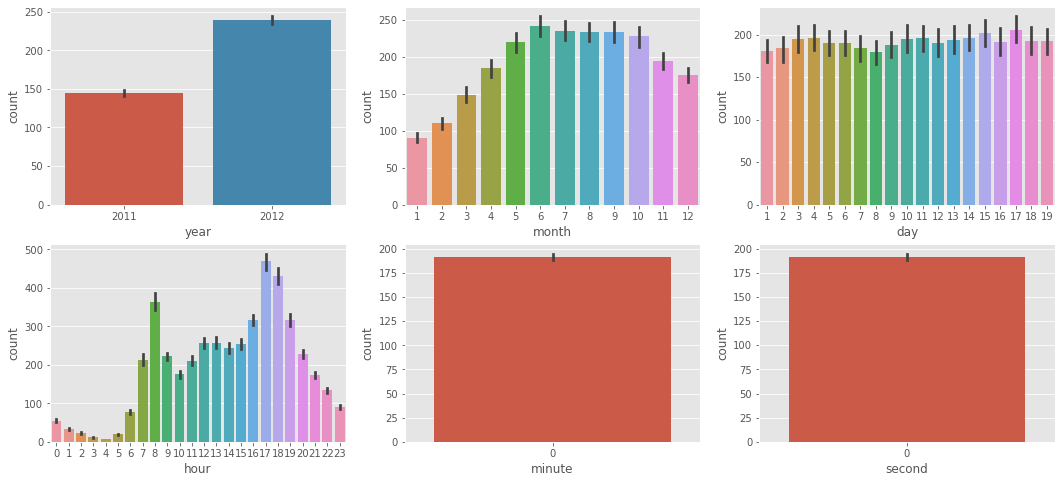

In [11]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count",ax=ax1)
sns.barplot(data=train, x="month", y="count",ax=ax2)
sns.barplot(data=train, x="day", y="count",ax=ax3)
sns.barplot(data=train, x="hour", y="count",ax=ax4)
sns.barplot(data=train, x="minute", y="count",ax=ax5)
sns.barplot(data=train, x="second", y="count",ax=ax6)

- 2011년 대여량 < 2012년 대여량 (홍보효과?)
- 6,7,8,9,10월 대여량 높음 -> 자전거 타기 좋은 날씨
- train set은 일별 데이터 1~19일까지만 포함 -> 분석 feature로 사용하기 어려움
- 시간별 데이터를 보면 출 퇴근시간에 높은 분포 -> 주말과 나누어 확인 필요
- 분,초 단위 parsing x -> feature로 사용 무의미

<AxesSubplot:xlabel='workingday', ylabel='count'>

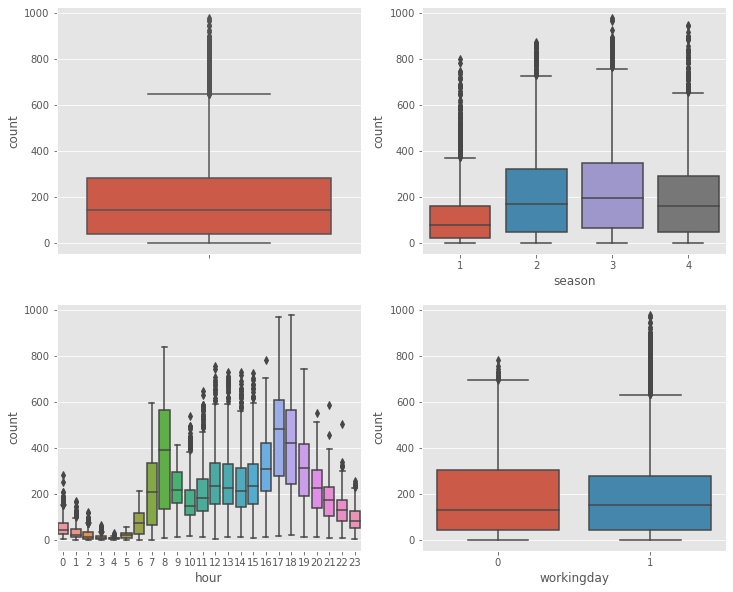

In [12]:
figure, axes = plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(12, 10)

sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

In [13]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [14]:
train.head()
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

In [15]:
corrMatt = train[["temp","atemp","casual","registered","humidity","windspeed","count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<AxesSubplot:>

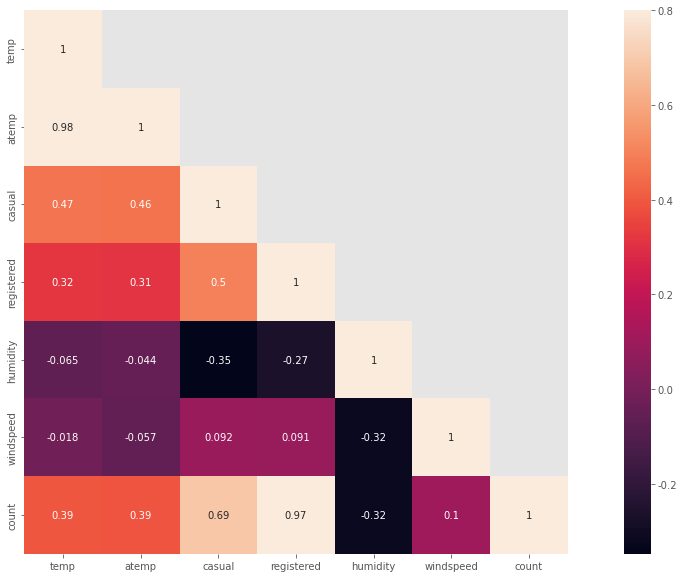

In [16]:
figure, ax = plt.subplots()
figure.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot = True)

<AxesSubplot:xlabel='humidity', ylabel='count'>

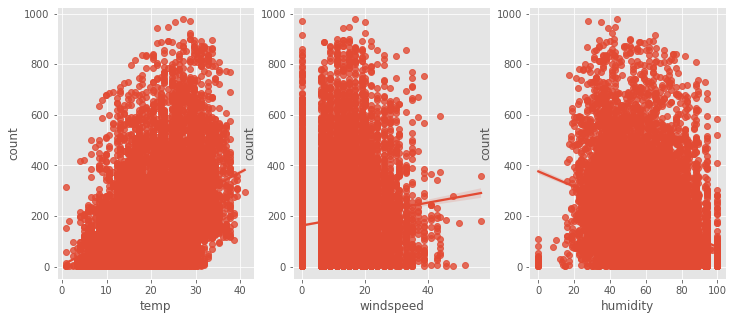

In [17]:
figure, (ax1,ax2,ax3) = plt.subplots(ncols=3)
figure.set_size_inches(12,5)

sns.regplot(x="temp",y="count",data=train,ax=ax1)
sns.regplot(x="windspeed",y="count",data=train,ax=ax2)
sns.regplot(x="humidity",y="count",data=train,ax=ax3)

- 관측값이 0에 몰려있는 값들? -> 아마 관측이 제대로 이루어지지 않아서 default 값으로 0을 부여

In [18]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year,datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

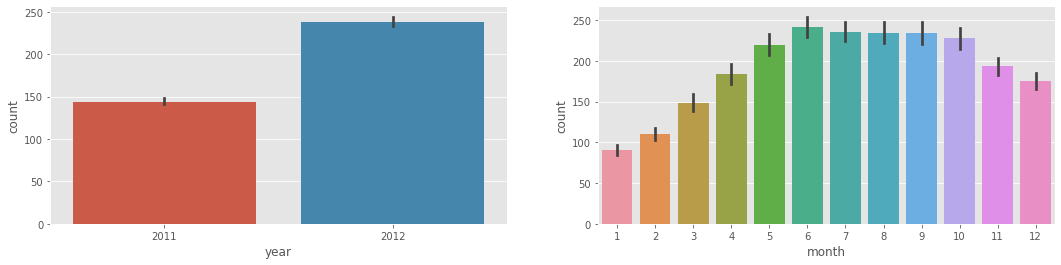

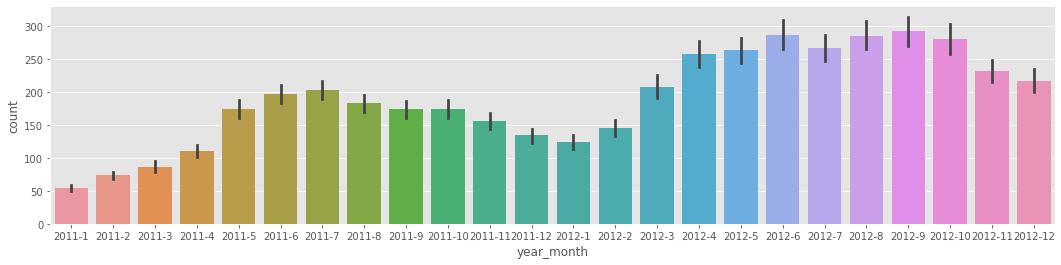

In [19]:
figure, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.barplot(data=train, x="year_month", y="count",ax=ax3)

In [25]:
# 아웃라이어 제거

trainWOOutliers = train[np.abs(train["count"]-train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWOOutliers.shape)

(10886, 20)
(10739, 20)


/Users/hongjeong-u/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hongjeong-u/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([  1,   1,   1, ..., 732, 733, 734])),
 (157.64684236586106, 183.00381786013588, 0.945524033356112))

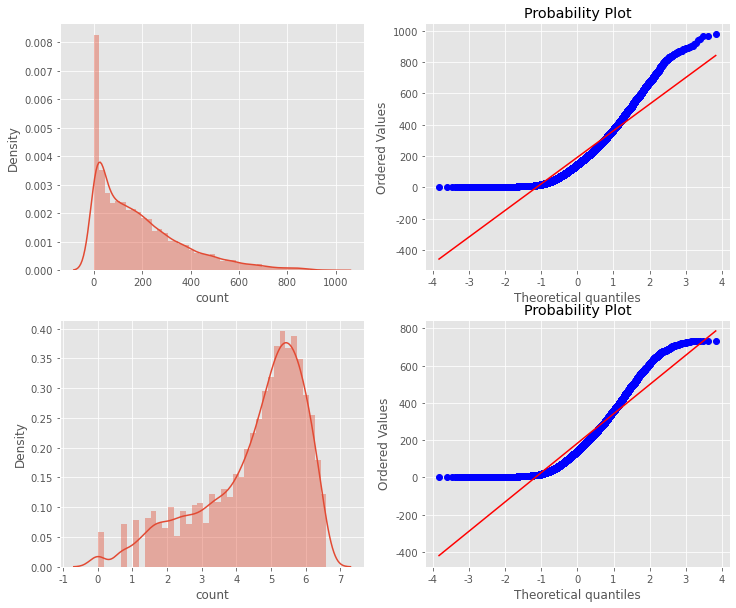

In [27]:
figure, axes = plt.subplots(ncols=2,nrows=2)
figure.set_size_inches(12,10)

sns.distplot(train["count"],ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])

sns.distplot(np.log(trainWOOutliers["count"]),ax=axes[1][0])
stats.probplot(trainWOOutliers["count"], dist='norm', fit=True, plot=axes[1][1])